# ANOVA

### ANOVA (Analysis of Variance)

**Purpose**: Compares the means of three or more groups to determine if at least one group differs significantly.

#### Key Points:
- **Null Hypothesis (H₀)**: All group means are equal.
- **Alternative Hypothesis (H₁)**: At least one group mean is different.
- **F-Statistic**: Measures variance between groups relative to variance within groups.
- **P-Value**: Indicates the probability of observing the data if H₀ is true.

#### Decision:
- If **p-value < 0.05**, reject H₀ (significant differences exist).
- If **p-value ≥ 0.05**, fail to reject H₀ (no significant differences).

#### Example Use Cases:
- Testing the effectiveness of different treatments.
- Comparing performance across multiple groups.


##### `TLDR:` **t-test:** Compares the means of *two groups*. **ANOVA:** Compares the means of *three or more groups*.

>Similar to t-test, teherei is paired and unpaired ANOVA:

### Types of ANOVA

1. **Paired ANOVA (Repeated Measures ANOVA)**:
   - Used when the **same subjects** are measured under different conditions.
   - Accounts for the correlation between repeated measurements.
   - Example: Testing the same group of patients before, during, and after treatment.

2. **Unpaired ANOVA (One-Way ANOVA)**:
   - Used when comparing **independent groups**.
   - Assumes no relationship between the groups.
   - Example: Comparing test scores of students from three different schools.


In [101]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Import Pandas
import pandas as pd

## More Samples

In [102]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

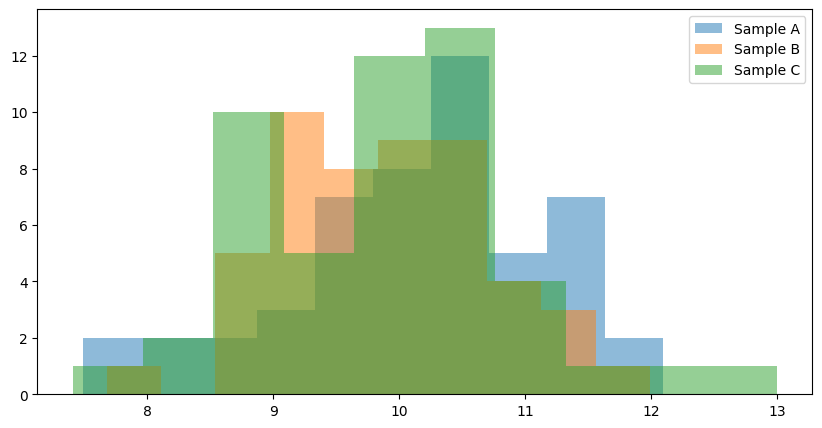

In [103]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

### Comparing groups manually

In [104]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(1.3173012329851874, 0.19080932951409396)

In [105]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(-1.3173012329851874, 0.19080932951409396)

In [106]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(1.1105028214955748, 0.26949972309139736)

In [107]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(-0.13228332766299147, 0.8950314162630271)

##### t-test Output analysis from manual comparison.
+ A vs B: Significant difference (t = -2.34, p = 0.021).
+ B vs A: Significant difference (t = 2.34, p = 0.021).
+ A vs C: No significant difference (t = -1.37, p = 0.174).
+ B vs C: No significant difference (t = 0.70, p = 0.483).

>*Manually comparing multiple groups using multiple t-tests is not ideal.* <br>**ANOVA is preferred because it:**<br> - Reduces the risk of Type I errors (false positives) that increase with multiple t-tests.<br>- Analyzes all group differences simultaneously.


## $n$ Samples

In [108]:
# Number of samples.
n = 4

In [109]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [110]:
# Number of ways (combinations) of selecting two samples from n.
math.comb(n, 2)

6

In [111]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2) # calculate number of combinations

15

In [112]:
# Suppose we had 6 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

A **Type I error** occurs when the null hypothesis is incorrectly rejected (claiming falsly that significant differences exist between group means when they do not).

#### Causes:
- **High alpha level**: Using a significance level (α) that's too high (e.g., 0.1 instead of 0.05).
- **Multiple comparisons**: Increased likelihood of Type I errors when comparing multiple groups.

#### Mitigation:
- Use a **lower alpha level** (e.g., 0.01) for stricter significance testing.
- Apply **post hoc tests** with corrections (e.g., Bonferroni, Tukey's HSD) to control for the family-wise error rate.


### Type II Error in ANOVA

Occurs when you fail to reject the null hypothesis despite significant differences existing (false negative).

#### Causes:
- Small sample size.
- High within-group variability.
- Small effect size.
- Low significance level (α).

#### Mitigation:
- Increase sample size.
- Reduce variability.
- Use α = 0.05 for balance.
- Ensure sufficient statistical power.


In [ ]:
# simulate random t-test
def simulate_ttest(alpha=0.05):
    # Geneate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [ ]:
# Simulate Type I. error rate
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000): #run 10000 simulations
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

487

Above function simulates the Type I error rate (false positives) under repeated tests with random data, assuming the null hypothesis is true. For an alpha of 0.05, the result should approximate 5% of 10,000 (about 500 rejections).

## ANOVA example from SPSS
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics-2.php


In [115]:
#From Laerd
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4,3.23866,10)

In [116]:
# create dataframe
df = pd.DataFrame({"Beginner": np.random.normal(27.2, 3.04777, 10), "Intermediate": np.random.normal(23.6, 3.30656, 10), "Advanced": np.random.normal(23.4, 3.23866, 10)})
df

,Beginner,Intermediate,Advanced
0,31.513144,25.637253,17.754617
1,23.095648,22.512776,19.163116
2,27.107637,21.977176,21.202580
3,28.271780,21.180383,22.985063
4,27.633622,22.123498,22.601207
5,30.194986,24.774150,25.199166
6,23.619269,22.101256,26.237652
7,33.847995,32.592532,28.375906
8,30.017588,23.928762,19.545258
9,24.375347,25.618990,25.164998


In [117]:
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,27.967702,24.244678,22.822956
std,3.540330,3.341979,3.434366
min,23.095648,21.180383,17.754617
25%,25.058420,22.106817,19.959588
50%,27.952701,23.220769,22.793135
75%,30.150637,25.407780,25.190624
max,33.847995,32.592532,28.375906


In [118]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(df['Beginner'],df['Intermediate'],df['Advanced'])
print(f"f_statistic: {f_statistic}, p_value: {p_value}")

f_statistic: 5.965272424840813, p_value: 0.00715301787820869


#### Tukey's HSD (Honestly Significant Difference)
Tukey's HSD is a post hoc test used after ANOVA to identify which specific group means differ significantly while controlling for Type I errors.

In [ ]:
#Tukey's HSD (Honestly Significant Difference)
res=stats.tukey_hsd(df['Beginner'],df['Intermediate'],df['Advanced'])
print(res)
# if any of the comparison's p value is under 0.05 it indicates significant difference for that group

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.723     0.057    -0.091     7.537
 (0 - 2)      5.145     0.007     1.331     8.959
 (1 - 0)     -3.723     0.057    -7.537     0.091
 (1 - 2)      1.422     0.630    -2.392     5.236
 (2 - 0)     -5.145     0.007    -8.959    -1.331
 (2 - 1)     -1.422     0.630    -5.236     2.392



### Presenting the Data

In [125]:
#From Laerd
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4,3.23866,10)

data=np.concatenate([beginner,intermediate,advanced])

In [126]:
labels = ["Beginner"] * 10 + ["Intermediate"] * 10 + ["Advanced"] * 10
#labels

In [129]:
df=pd.DataFrame({'Course':labels, 'Time':data})
df

,Course,Time
0,Beginner,34.401432
1,Beginner,28.600571
2,Beginner,22.431656
3,Beginner,30.637718
4,Beginner,27.095692
5,Beginner,32.107694
6,Beginner,24.833699
7,Beginner,33.896352
8,Beginner,30.521209
9,Beginner,28.751423


In [ ]:
# Separate the groups
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']

f,p = stats.f_oneway(b_times,i_times,a_times)
print(f,p)

11.934298448864233 0.00019334772823026558


In [131]:
#Tukey's HSD (Honestly Significant Difference)
res=stats.tukey_hsd(b_times,i_times,a_times)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      6.293     0.000     2.774     9.812
 (0 - 2)      5.667     0.001     2.149     9.186
 (1 - 0)     -6.293     0.000    -9.812    -2.774
 (1 - 2)     -0.625     0.899    -4.144     2.893
 (2 - 0)     -5.667     0.001    -9.186    -2.149
 (2 - 1)      0.625     0.899    -2.893     4.144



## End